```bash
ls query_basep/features/ResNet18_1013_213017/ | head -3 
1003-105731288.npy
1017-105749098.npy
1021-105749428.npy
```

```bash
ls gallery/features/ResNet18_1013_213017/ | grep -E '^(1003|1017|1021)' | head -10
1003-95601599.npy
1017-50364234.npy
1021-59517078.np
```


In [1]:
!pip install matplotlib scipy numpy pillow

In [2]:
from jfingerprint.indexing import *
from jfingerprint.plotting import *
import pickle

gallery_dataset = {"path": "/data/gallery/", "img_path": "images/", "patch_path": "patches/", "mnt_path": "mnts/", "features_path": "features/ResNet18_1013_213017/"}
queries_dataset = {"path": "/data/query_basep/", "img_path": "images/", "patch_path": "patches/", "mnt_path": "mnts/", "features_path": "features/ResNet18_1013_213017/"}

In [3]:
QDS = load_dataset_names(queries_dataset)
GDS = load_dataset_names(gallery_dataset)

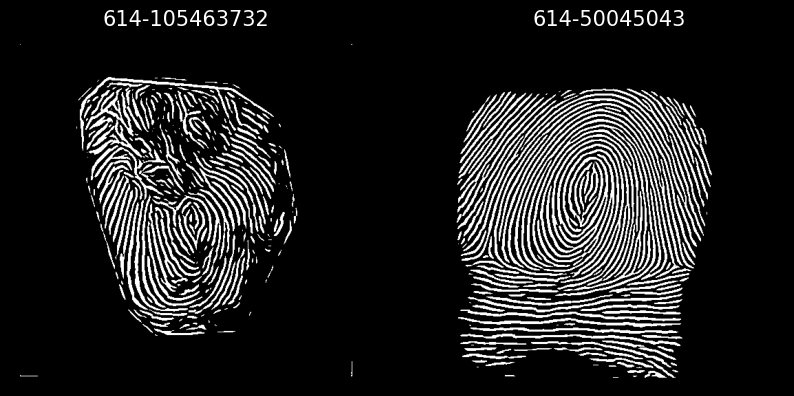

In [4]:
j = 235
i = find_gallery_associate(j, QDS, GDS)
data_q = {**queries_dataset, "individual": QDS[j]}
data_g = {**gallery_dataset, "individual": GDS[i]}
plot_fingerprint_compare([data_q, data_g], figsize=(10,8), fontsize=15)

In [5]:
with open('data/mtree_full.pkl', 'rb') as f:
    # 6min para criar
    mtree = pickle.load(f)

In [6]:
%%time
D = gallery_search(mtree, data_q)

CPU times: user 1min 6s, sys: 551 ms, total: 1min 6s
Wall time: 1min 6s


In [13]:
Score = calculate_score(D)

In [14]:
rank = list(Score.keys())
for idx, key in enumerate(rank):
    print("Sample:", key, "| Score:", f"{Score[key]:.3f}")

Sample: 6264 | Score: 13.720
Sample: 1453 | Score: 5.242
Sample: 1337 | Score: 4.474
Sample: 1287 | Score: 3.090
Sample: 5450 | Score: 2.981
Sample: 2231 | Score: 2.812
Sample: 5417 | Score: 2.436
Sample: 2062 | Score: 2.076
Sample: 2478 | Score: 2.073
Sample: 6479 | Score: 1.979
Sample: 6483 | Score: 1.979
Sample: 1096 | Score: 1.975
Sample: 437 | Score: 1.973
Sample: 1243 | Score: 1.920
Sample: 3892 | Score: 1.910
Sample: 3122 | Score: 1.194
Sample: 3277 | Score: 1.187
Sample: 3273 | Score: 1.177
Sample: 2521 | Score: 1.164
Sample: 1393 | Score: 1.156
Sample: 1903 | Score: 1.155
Sample: 1038 | Score: 1.130
Sample: 1518 | Score: 1.095
Sample: 1751 | Score: 1.088
Sample: 1220 | Score: 1.070
Sample: 377 | Score: 1.063
Sample: 1370 | Score: 1.058
Sample: 1912 | Score: 1.052
Sample: 4741 | Score: 1.044
Sample: 4863 | Score: 1.037
Sample: 16 | Score: 1.032
Sample: 284 | Score: 1.031
Sample: 2230 | Score: 1.030
Sample: 1500 | Score: 1.028
Sample: 5311 | Score: 1.022
Sample: 2652 | Score: 1.

In [15]:
for i in range(10):
    print(GDS[rank[i]], Score[rank[i]])

614-50045043 13.720157714735766
2278-84540941 5.2423535601602635
2173-92876057 4.473521441381242
2128-79297158 3.089525970337092
26344-rollU04 2.9813595553220655
23519-rollV09 2.8119034832724425
26309-rollV09 2.435903511059821
23416-rollV06 2.0761743968398987
25584-rollU04 2.0726425933797277
383-48590641 1.978989187430205


In [19]:
def full_search(QDS, mtree, no_queries = 10):
    assert no_queries <= len(QDS), "Number of queries is greater than the number of queries in the dataset"

    result = {}
    for j in range(no_queries):
        data_q = {**queries_dataset, "individual": QDS[j]}
        D = gallery_search(mtree, data_q)
        Score = calculate_score(D)
        rank = list(Score.keys())
        result[j] = rank[:10]
    
        # Escreve o rank 10 no arquivo, data/full_search.txt
        with open('data/full_search.txt', 'a') as f:
            f.write(f"Query: {QDS[j]}\n")
            for idx, key in enumerate(rank):
                f.write(f"\tSample: {GDS[key]} | Score: {Score[key]:.3f}\n")
            f.write("\n")
    return result

In [20]:
full_search(QDS[235:236], mtree, no_queries = 1)

PermissionError: [Errno 13] Permission denied: 'data/full_search.txt'